## Main Task:
The task is to examine the relationship between a number of predictors and whether a family chooses to switch to a well with lower arsenic content (switch = "yes") or not (switch = "no").

### Data Understanding
Dataset **Wells** dealing with arsenic concentration in wells in Bangladesh. The dataset contains 3020 observations, and each observation corresponds to a family whose nearest well contains unsafe levels of arsenic (above 0.5 micrograms per liter)!  
The dataset contains the following features:  

1. "id" - ID-number of an observation
2. "switch" - switch 'yes' = 1, switch 'no' = 0
3. "arsenic" - shows the arsenic level.
4. "dist" - distance to a well.
5. "assoc" - association.
6. "education" - education level.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Datasets/wells.csv", sep=' ')

In [3]:
dataset.head()

,id,switch,arsenic,dist,assoc,educ
0,1,1,2.36,16.826000,0,0
1,2,1,0.71,47.321999,0,0
2,3,0,2.07,20.966999,0,10
3,4,1,1.15,21.486000,0,12
4,5,1,1.10,40.874001,1,14


In [4]:
# Dropping the ID column
dataset = dataset.drop(columns=['id'])

In [5]:
dataset.describe()

,switch,arsenic,dist,assoc,educ
count,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,0.575166,1.656930,48.331863,0.422848,4.828477
std,0.494400,1.107387,38.478675,0.494093,4.017317
min,0.000000,0.510000,0.387000,0.000000,0.000000
25%,0.000000,0.820000,21.117250,0.000000,0.000000
50%,1.000000,1.300000,36.761499,0.000000,5.000000
75%,1.000000,2.200000,64.041000,1.000000,8.000000
max,1.000000,9.650000,339.531006,1.000000,17.000000


### Descriptive Analysis

#### SWITCH

In [6]:
# Frequency table
switch_counts = dataset['switch'].value_counts()
print(switch_counts)

switch
1    1737
0    1283
Name: count, dtype: int64


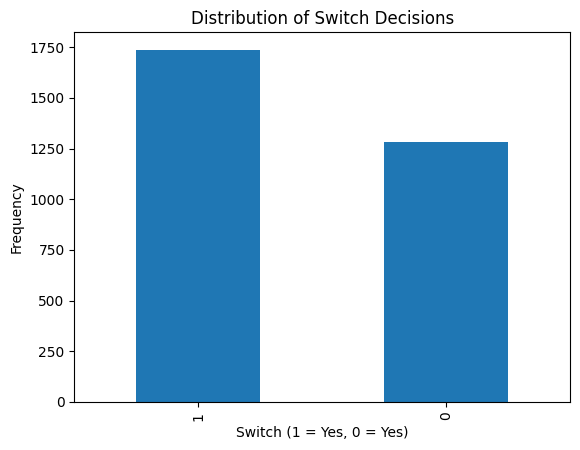

In [7]:
# Bar chart
switch_counts.plot(kind='bar')
plt.title('Distribution of Switch Decisions')
plt.xlabel('Switch (1 = Yes, 0 = Yes)')
plt.ylabel('Frequency')
plt.show()

#### ARSENIC

In [8]:
# Summary statistics for 'arsenic'
arsenic_summary = dataset['arsenic'].describe()
print(arsenic_summary)

count    3020.000000
mean        1.656930
std         1.107387
min         0.510000
25%         0.820000
50%         1.300000
75%         2.200000
max         9.650000
Name: arsenic, dtype: float64


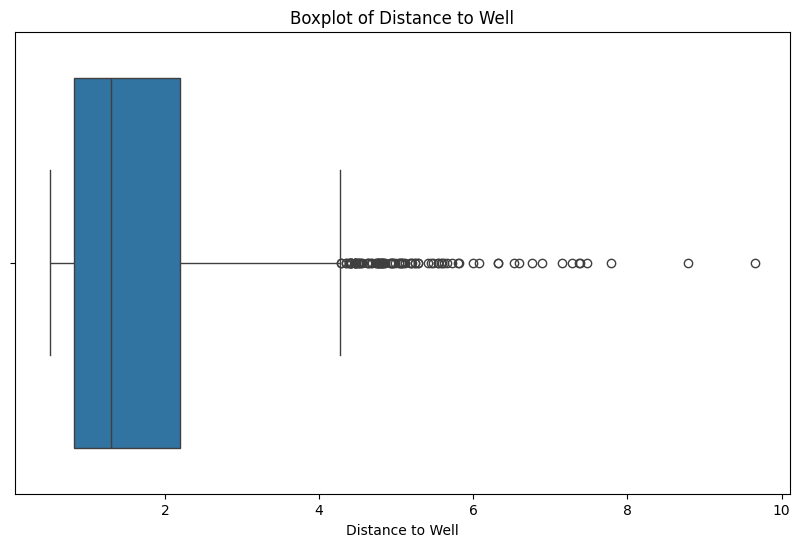

In [9]:
# Boxplot for 'arsenic'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['arsenic'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()


> The graph is very right skewed! Logistic regression is quite robust to skewed predictor variables, We take the logarithm of it to mitigate the outliers

In [10]:
# Log transformation
dataset['log_arsenic'] = np.log1p(dataset['arsenic'])

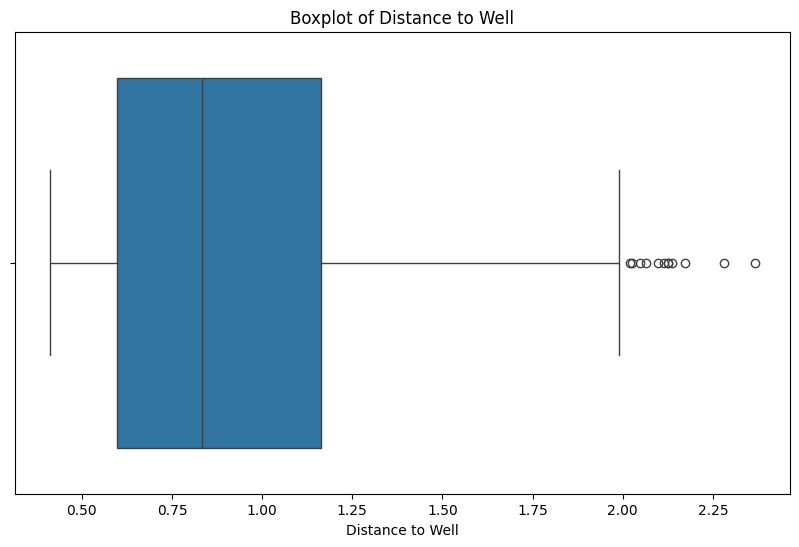

In [11]:
# Boxplot for 'dist'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['log_arsenic'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()

#### DIST

In [12]:
# Summary statistics for 'dist'
dist_summary = dataset['dist'].describe()
print(dist_summary)

count    3020.000000
mean       48.331863
std        38.478675
min         0.387000
25%        21.117250
50%        36.761499
75%        64.041000
max       339.531006
Name: dist, dtype: float64


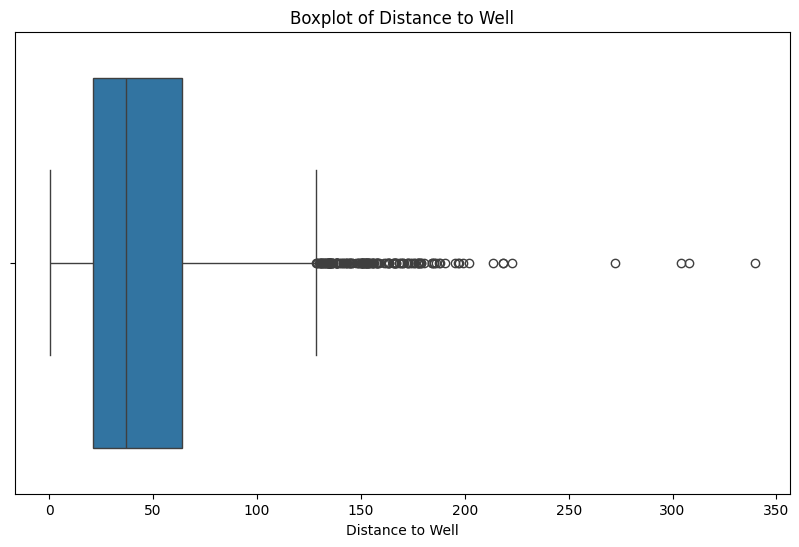

In [13]:
# Boxplot for 'dist'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['dist'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()


In [14]:
dataset['log_dist'] = np.log1p(dataset['dist'])

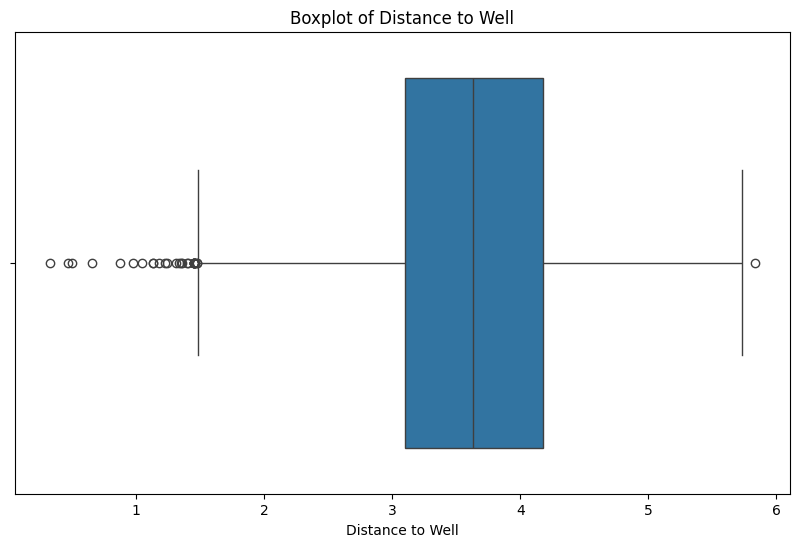

In [15]:
# Boxplot for 'dist'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['log_dist'])
plt.title('Boxplot of Distance to Well')
plt.xlabel('Distance to Well')
plt.show()

#### ASSOC

In [17]:
# Frequency table for 'assoc'
assoc_counts = dataset['assoc'].value_counts()
print(assoc_counts)

assoc
0    1743
1    1277
Name: count, dtype: int64


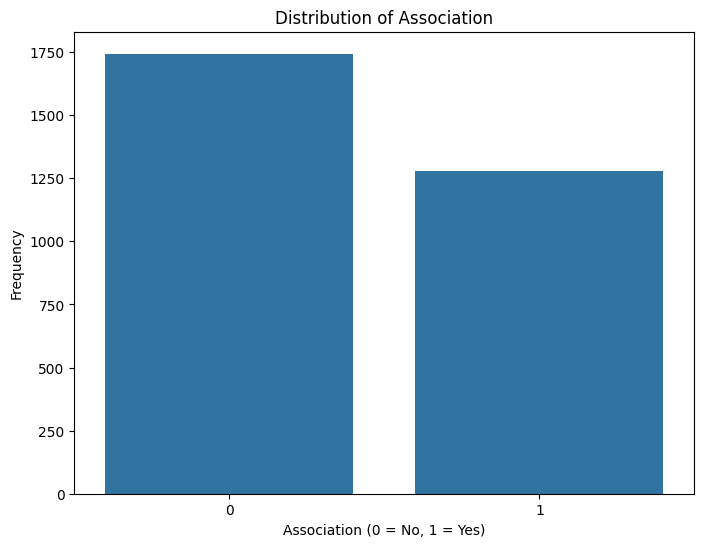

In [19]:
# Bar chart for 'assoc'
plt.figure(figsize=(8, 6))
sns.barplot(x=assoc_counts.index, y=assoc_counts.values)
plt.title('Distribution of Association')
plt.xlabel('Association (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()

#### Education

In [21]:
# Summary statistics for 'education'
education_summary = dataset['educ'].describe()
print(education_summary)

count    3020.000000
mean        4.828477
std         4.017317
min         0.000000
25%         0.000000
50%         5.000000
75%         8.000000
max        17.000000
Name: educ, dtype: float64


In [26]:
dataset.head()

,switch,arsenic,dist,assoc,educ,log_arsenic,log_dist
0,1,2.36,16.826000,0,0,1.211941,2.880658
1,1,0.71,47.321999,0,0,0.536493,3.877887
2,0,2.07,20.966999,0,10,1.121678,3.089541
3,1,1.15,21.486000,0,12,0.765468,3.112893
4,1,1.10,40.874001,1,14,0.741937,3.734665


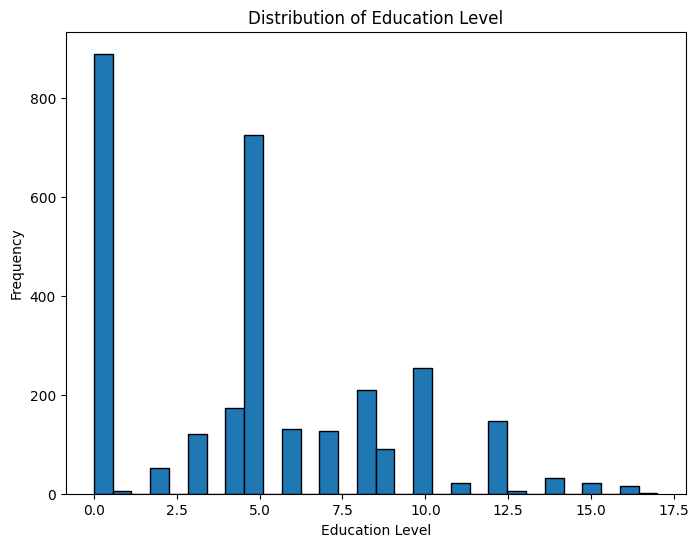

In [25]:
# Histogram for 'education'
plt.figure(figsize=(8, 6))
plt.hist(dataset['educ'], bins=30, edgecolor='k')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()